# Tutorial: Refresher for solving oridinary least squares

This tutorial and the previous one explore math concepts that will be helpful for understanding the lectures and homeworks. 

## Goals:
* Refresher on derivatives, logarithms and expected values

This lab draws from [Paul's Math Notes](https://tutorial.math.lamar.edu/pdf/calculus_cheat_sheet_derivatives.pdf).

---
# Derivatives

## What is a derivative?

The formal definition of a derivative is: 

$$\frac{df}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$

The plain language definition of a derivative is something along the lines of, "How is my function $f$ changing with respect to the variable $x$?" You can also think of a derivative as the slope of a function for given values of the variables. 

*See these two videos ([video 1](https://www.youtube.com/watch?v=tt2DGYOi3hc&list=PLmxWmlga0Kgoe-gvtTW4i32Lc_3JI_bEK&index=6), [video 2](https://www.youtube.com/watch?v=50Bda5VKbqA&list=PLmxWmlga0Kgoe-gvtTW4i32Lc_3JI_bEK&index=7)) for a satisfying explanation of how these two definitions connect.*


## Examples

Two quick examples to drive home the idea of what a derivative is: 

**1.**   The derivative of $x^2$ is $2x$. Let's plot both of these functions in R. 

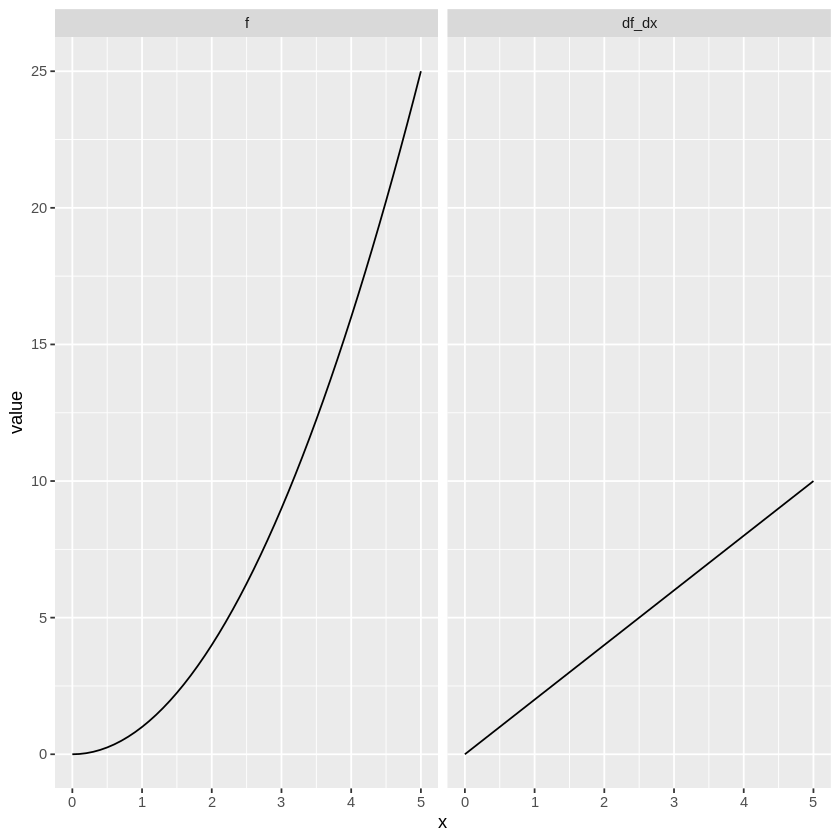

In [ ]:
x <- seq(0,5,0.1) # x is a vector with numbers from 1 to 10
f <- x^2 # f is a vector with the values of the function for x = 1 to x = 10
df_dx <- 2*x # df_dx is a vector with the values of the derivative for x = 1 to x = 10
library(tidyverse)
x_dat <- data.frame(x=x,f=f,df_dx=df_dx) # make a data frame so we can plot these nicely
x_dat <- gather(x_dat, "func","value",f:df_dx) # put data frame in long form
x_dat$func <- x_dat$func %>% factor() %>% relevel("f") # makes it so "f" is the function plotted on left
ggplot(x_dat,aes(x=x,y=value)) + geom_line() + facet_grid(. ~ func) # plot func

Notice how, in the "f" plot, the slope of the line increases as the value of `x` increases. This is reflected in the "df_dx" plot: larger values of `x` have a larger derivative, and this increase is linear. 


**2.**   The derivative of $cos(x)$ is $-sin(x)$. Let's plot both of these. 



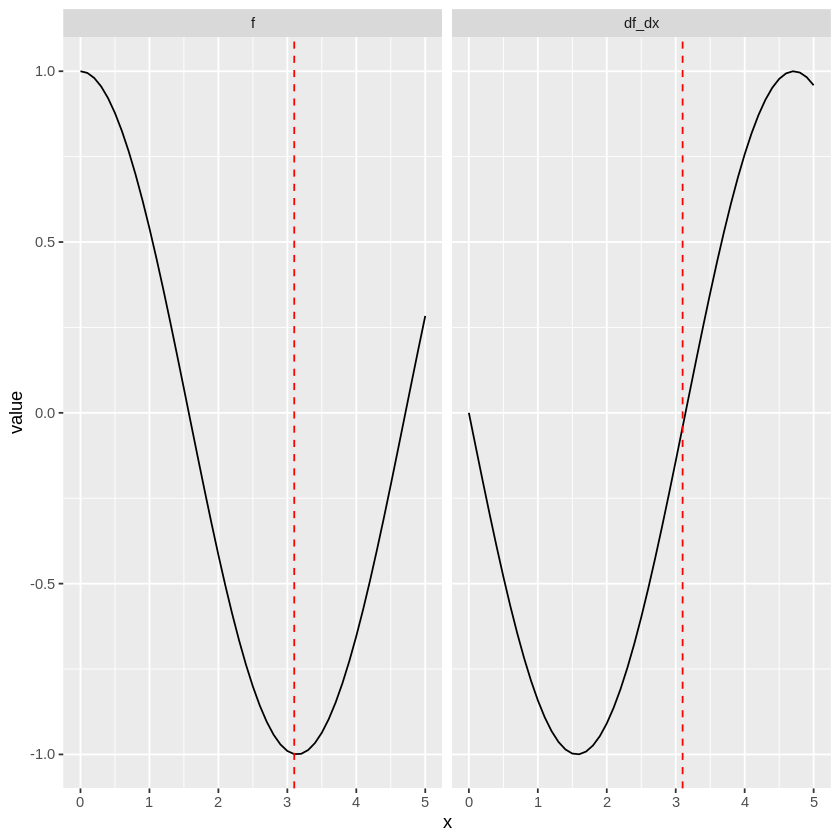

In [ ]:
x <- seq(0,5,0.1)
f <- cos(x)
x_min <- x[which.min(f)] # find the x value where f is at minimum
df_dx <- -sin(x)
x_dat <- data.frame(x=x,f=f,df_dx=df_dx) # make a data frame so we can plot these nicely
x_dat <- gather(x_dat, "func","value",f:df_dx) # put data frame in long form
x_dat$func <- x_dat$func %>% factor() %>% relevel("f") # makes it so "f" is the function plotted on left
ggplot(x_dat,aes(x=x,y=value)) + geom_line() + facet_grid(. ~ func) +
      geom_vline(xintercept = x_min,linetype="dashed",color="red")# add line where f is min

At `x = 0`, the slope of the function is 0. Then it becomes negative, with increasing steepness from `x = 0` to around `x = 1.5`, and decreasing steepness from there to around `x=3`. This description of the slope matches how the derivative looks. 

The main reason for us to work with derivatives in this class is as a tool for finding what value of $x$ minimizes $f(x)$. When $f(x)$ reaches a local minimum or maximum, the derivative is 0 (like at the red dotted line in the second example above). So if we're trying to find the value of $\beta_0$ that minimizes the Mean Squared Error (MSE - see lecture on Least Squares Solution), we can take the derivative of MSE with respect to $\beta_0$ ($\frac{dMSE}{d\beta_0}$), set it to 0, and then solve for $\beta_0$. We'll work through a couple examples of finding the value that minimizes a function. But first, a few tips on *how* to calculate the derivative of a function. 

## Tips on calculating the derivative

### 1. A constant function

If your function is a constant, e.g. $f(x) = 3$, then the derivative is 0. This makes sense if you picture the plot of $f(x)=3$. No matter what the value of $x$, the value of $f(x)$ is 3, so the plot of $f(x) = 3$ is a flat line with slope 0. As a general expression of this rule: 
$$\frac{d}{dx}(c) = 0$$

### 2. The Power Rule

If the function you're working with fits the format $f(x) = x^n$, then you can calculate the derivative as $\frac{df}{dx} = nx^{n-1}$. For example, $\frac{d}{dx}(x^3) = 3x^{2}$, and $\frac{d}{dx}(x^{p+q+1}) = (p+q+1)x^{p+q}$. The general expression of this rule is: 
$$\frac{d}{dx}(x^n) = nx^{n-1}$$

Note that a lot of functions can be rewritten to match the $x^n$ format:

* $\frac{d}{dx}(\frac{1}{x}) = \frac{d}{dx}(x ^ {-1}) = -x^{-2} = -\frac{1}{x^2}$

* $\frac{d}{dx}(\sqrt{x}) = \frac{d}{dx}(x^{\frac{1}{2}}) = \frac{1}{2}x^{-\frac{1}{2}} = \frac{1}{2\sqrt{x}}$

* $\frac{d}{dx}(x) = \frac{d}{dx}(x^1) = 1x^0 = 1$. 

### 3. Taking out a constant 

If your function is multiplied by a constant, your derivative will also by multiplied by that constant. For example, $\frac{d}{dx}(4x^2) = 4(2x) = 8x$. As a general expression of this rule: 
$$\frac{d}{dx}(cf(x)) = c\frac{df}{dx}$$


### 4. Added functions
If your function is actually two functions added together, like $3x - x^2$, then you can just take the derivative of each term separately ($3x$, then $-x^2$) and add them together: $\frac{d}{dx}(3x-x^2) = 3 - 2x$. As a general expression of this rule: 
$$\frac{d}{dx}(f(x) + g(x)) = \frac{df}{dx} + \frac{dg}{dx}$$

### 5. Functions with two variables

The reason we talk about taking the derivative *with respect to $x$* is that in cases where the function has multiple variables, you need to specify which variable you are focusing on: my function $f(x_1,x_2)$ could change with respect to $x_1$ differently from how it changes with respect to $x_2$, and thus $\frac{df}{dx_1} \neq \frac{df}{dx_2}$. If you're calculating the derivative with respect to one variable, you can treat the other variable as if it is a constant. For example, the derivative of $2x_1 + 4x_1x_2 - {x_2}^2$ with respect to $x_1$ is $2 + 4x_2$. We ignore the last term because it doesn't contain $x_1$, so we view it as a constant and its derivative (according to rule 1 above) is 0. The derivative of this function with respect to $x_2$ is $4x_1 - 2x_2$.

## Using the derivative to find minimizing values: 2 worked examples

Now we'll practice finding the value of $x$ for which $f(x)$ is minimal.

**Example 1** $f(x) = (x-2)^2 + 6$

Let's see what a plot of this function looks like: 

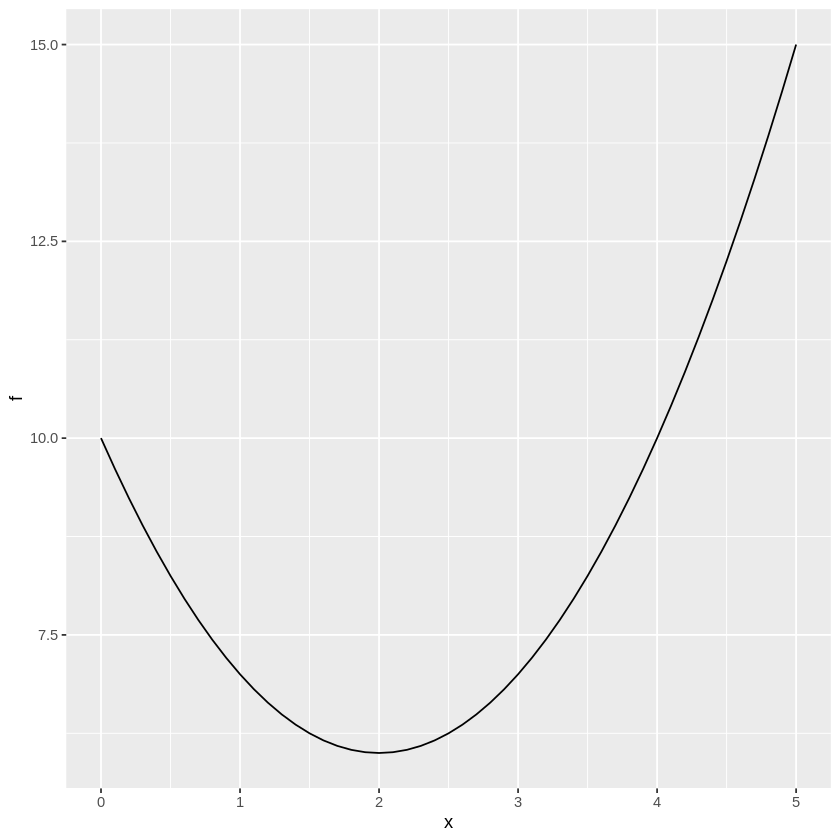

In [ ]:
x <- seq(0,5,0.1)
f <- (x-2)^2 + 6
x_dat <- data.frame(x,f)
require(ggplot2) #in case you need to load the library again
ggplot(x_dat,aes(x=x,y=f)) + geom_line()


Just looking at the plot above, we can tell the minimum of $f(x)$ is where $x=2$. But let's make sure, using the derivative method! 

\begin{eqnarray}
 \frac{d}{dx}((x-2)^2 + 6) &=& \frac{d}{dx}(x-2)^2 + \frac{d}{dx}6  \\
   &=& \frac{d}{dx}(x^2-4x+4) + 0 \\
   &=& \frac{d}{dx}(x^2)-4\frac{d}{dx}x+\frac{d}{dx}4 \\
   &=& 2x - 4
\end{eqnarray}

In the first line, I split up the function using rule **4**. Then I expanded the $(x-2)^2$ term using the [Foil method](https://www.mathsisfun.com/definitions/foil-method.html), set $\frac{d}{dx}6$ to 0 as in rule **1**, and finally took the derivative of $x^2 - 4x + 4$ by applying rule **2** to the first term, rules **2** and **3** to the second term, and rule **1** to the last term. 

Now let's set it to 0 and solve for x. 


\begin{eqnarray}
 2x - 4 &=& 0  \\
 2x  &=& 4  \\
 x  &=& 2
\end{eqnarray}

So $f(x)$ is at a minimal value when $x=2$, which matches what we see in the plot above. 

**Example 2** $f(x_1,x_2) = 4x_1x_2 + \frac{1}{x_2} + {x_1}^2$

This one's a little trickier to visualize since there's two input variables, so let's just jump right into finding the minimizing solutions for $x_1$.

\begin{eqnarray}
 \frac{d}{dx_1}(4x_1x_2 + \frac{1}{x_2} + {x_1}^2) &=& \frac{d}{dx_1}(4x_1x_2) + \frac{d}{dx_1}(\frac{1}{x_2}) +  \frac{d}{dx_1}{x_1}^2 \\
   &=& 4x_2  + 2x_1\\
\end{eqnarray}

We split up the three terms. The second term becomes 0 because when we're taking the derivative with respect to $x_1$, we can think of terms that only contain $x_2$ as constant (rule **5**) and then apply rule **1**. The first term, $4x_1x_2$, can be expressed as $(4x_2)x_1$, and the $4x_2$ term can be moved outside the derivative as a constant (rules **3**,**5**). Then use rule **2** to find $\frac{d}{dx_1} x_1$ and $\frac{d}{dx_1} {x_1}^2$. 

Setting $\frac{df}{dx_1}$ to 0 and solving for $x_1$, we find that the minimizing value of $x_1$ is $-2x_2$.

Repeat for $x_2$:

\begin{eqnarray}
 \frac{d}{dx_2}(4x_1x_2 + \frac{1}{x_2} + {x_1}^2) &=& \frac{d}{dx_2}(4x_1x_2) + \frac{d}{dx_2}(\frac{1}{x_2}) + \frac{d}{dx_2}({x_1}^2)  \\
   &=& 4x_1 - \frac{1}{{x_2}^2}  \\
\end{eqnarray}

The derivative of the third term is 0 because of rules **1** and **5**. We find the derivative of the second term using rule **2** and of the first term using rules **3** and **5**. 

Setting the derivative to 0 and solving for $x_2$: 

\begin{eqnarray}
  4x_1 - \frac{1}{{x_2}^2} &=& 0  \\
   {x_2}^2 &=& \frac{1}{4x_1}  \\
\end{eqnarray}

Since we know the minimizing value for $x_1$ is $-2x_2$ from our work above, we can try plugging that in here to find the values of $x_1$ and $x_2$ that will minimize the whole function: 

\begin{eqnarray}
  {x_2}^2 &=& \frac{1}{4(-2x_2)}  \\
   -8 {x_2}^3 &=& 1  \\
   {x_2}^3 &=& -\frac{1}{8} \\
   {x_2} &=& -\frac{1}{2}
\end{eqnarray}

Plugging this into our equation for $x_1$, we get $x_1 = -2x_2 = 1$. So $f(x_1,x_2)$ is minimized at $x_1 = 1$, $x_2 = -\frac{1}{2}$

That's all for derivatives! Let's move on to logarithms. 

---
# Logarithms

## What is a logarithm?

Using a logarithm is the opposite of using an exponent: You can re-write the function $4^x = 16$ as $x = \log_{4}16$. The small number at the base of $\log$ (the *base*) is the number that will be raised to a certain power, and the big number is what we get once it's been raised to that power. $\log_{5}25 = 2$ because $5^2 = 25$, and $\log_{2}16 = 4$ because $2^4=16$. 

When we use logarithms in this class, we'll use the *natural log*: this is a logarithm where the base is always [$e$](https://www.youtube.com/watch?v=_-x90wGBD8U). We write natural logs as \ln$.

$$\ln{x} = \log_{e}x$$

## Working with logarithms

Here's a couple basic rules for working with natural logarithms. You can read more about these rules [here](https://mathinsight.org/logarithm_basics). 

### 1. e

Taking the natural log of $e$ is 1. Similarly, $\ln e^x = x$ and $e^{\ln{x}} = x$. Try proving this to yourself using our definition of natural logs above. 

### 2. Product

The natural log of a product is the sum of the natural logs of its factors:

$$\ln{xy} = \ln{x} + \ln{y}$$

### 3. Quotient

The natural log of two terms divided is the natural log of the numerator minus the natural log of the denominator. 

$$\ln{\frac{x}{y}} = \ln{x} - \ln{y}$$

### 4. Exponents

You can move the exponent inside a log term to the outside as a coefficient. 

$$\ln{x^y} = y\ln{x}$$

### 5. Derivative

The derivative of $ln(x)$ is $\frac{1}{x}$ (relatedly, the derivative of $e^x$ is $e^x$).



## Why are we using logarithms in this class?
The logarithm function is monotonically increasing. For our purposes, that means that when we take the log (natural log or otherwise) of a function, the values of the input variables where that functions reaches a local minimum or maximum are the same before and after the transformation. Here's a quick demonstration of that idea: 

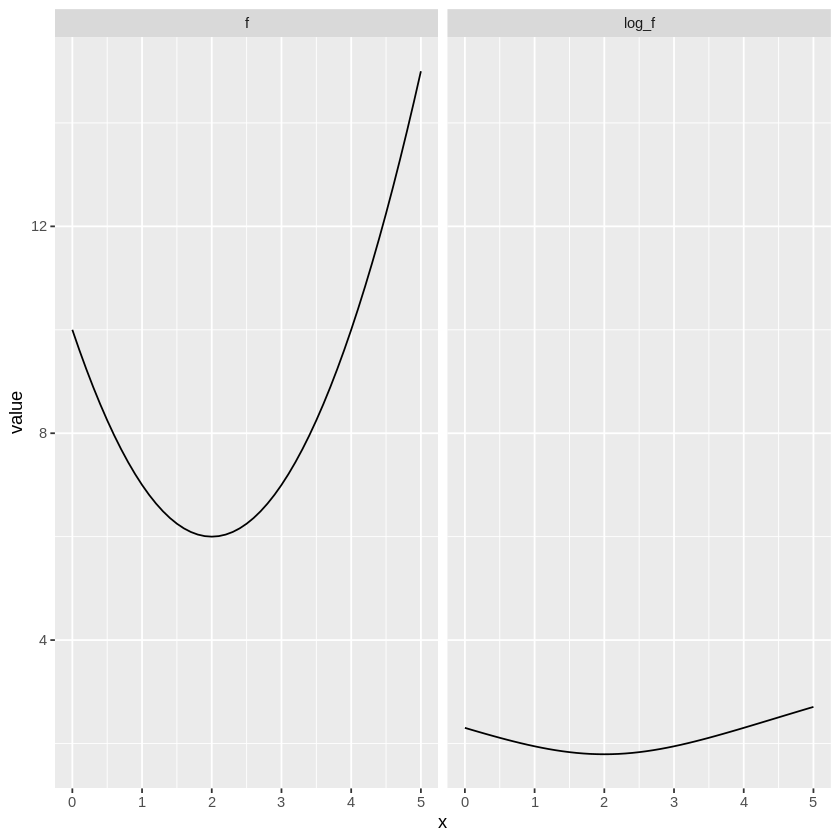

In [ ]:
x <- seq(0,5,0.1)
f <- (x-2)^2 + 6
log_f <- log(f)
x_dat <- data.frame(x,f,log_f)
require(tidyverse)
x_dat <- gather(x_dat,"func","value",f:log_f) #put this in long form
ggplot(x_dat,aes(x=x,y=value)) + geom_line() + facet_grid(.~func) #plot function and log transformation of function side by side. 

Even though the log transformation is flatter than the original function, it still has a minimum at x = 2. 

In the sections on maximum likelihood estimation discussed in readings and lecture, the task is to find values of $\beta_0$ and $\beta_1$ that maximize the likelihood for simple linear regression. The likelihood function is calculated as: 

$$ \prod_{i=1}^{n} p(y_i | x_i; \beta_0, \beta_1, \sigma) =  \prod_{i=1}^{n} \frac{1} {{\sigma \sqrt {2\pi } }} e^{{\frac{ - ( {y_i - (\beta_0 + \beta_1x_i) })^2 }{2\sigma^2} }} $$

If we want to find those maximizing solutions, we need to take the derivative. I didn't talk about it above, but taking the derivative of a product of functions is kind of a pain, especially if there are a lot of factors like there are in the equation above (remember from the previous tutorial that $\prod_{i=1}^{n}$ means you multiply that term for every value of $i$ from 1 to $n$). So to make this function easier to derive, we can take the log transformation! As stated above, the minimizing and maximizing values will stay the same after a log transformation, and using rule **2** from the logarithm rules we can make a long product into a long sum. Makes sense to take the natural log since that will also help simplify the exponential term ($e^{{\frac{ - ( {y_i - (\beta_0 + \beta_1x_i) })^2 }{2\sigma^2} }}$). 


\begin{eqnarray}
 \ln{L}(\beta_0, \beta_1, \sigma) &=& \ln \prod_{i=1}^{n} p(y_i | x_i; \beta_0, \beta_1, \sigma)  \\
   &=& \sum_{i=1}^{n} \ln  p(y_i | x_i; \beta_0, \beta_1, \sigma)  \\
   &=& \sum_{i=1}^{n} \ln (\frac{1} {{\sigma \sqrt {2\pi } }} e^{{\frac{ - ( {y_i - (\beta_0 + \beta_1x_i) })^2 }{2\sigma^2} }}) \\
   &=& \frac{-n}{2} \ln{2\pi} - n \ln{\sigma} - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2
\end{eqnarray}

Taking the natural log of the likelihood made this a much nicer function for taking the derivative and finding maximum values. Try getting from the third line to the fourth line by hand using the logarithm rules described above and the tips on working with summations from the previous tutorial. 

---
# Expected values

The expected value $E(X)$, sometimes referred to as the expectation, is the most probable value of $X$ given the probability distribution from which it was drawn. In the case of a normally distributed variable (which is what's relevant for this class), the expected value of $X$ is $\mu$, the center of the normal distribution, and expected value can be estimated from your data as the average of the observed values, $\bar{x}$.

Here, we'll review a few tips for working with expected values in equations. This will be helpful for the homework.  


**Tip 1:** The expected value of a constant is that constant.

$$E(c) = c$$

**Tip 2:** The expected value of a sum is equal to the added expected values of the terms being added.

$$E(X+Y) = E(X) + E(Y)$$

**Tip 3:** You can pull coefficients out of the expected value. 

$$E(cX) = cE(X)$$

**Tip 4:** The expected value of a random variable squared is the same as the squared expected value of that variable, plus its variance. 

$$E(X^2) = Var(X) + E(X)^2$$

**Tip 5:** The expected value of the product of two random variables is the covariance of those variables plus the product of their expected values. 

$$E(XY) = Cov(X,Y) + E(X)E(Y)$$


Here's one worked example to get you comfortable manipulating equations with expected values:

\begin{eqnarray}
 E((X + cY)^2) &=&  E(X^2 + 2cXY + c^2Y^2) \\
   &=& E(X^2) + E(2cXY) + E(c^2Y^2)  \\
   &=& E(X^2) + 2cE(XY) + c^2E(Y^2) \\
   &=& Var(X) + E(X)^2 + 2c(Cov(X,Y) + E(X)E(Y)) + c^2(Var(Y) + E(Y)^2) \\
   &=& Var(X) + E(X)^2 + 2c Cov(X,Y) + 2cE(X)E(Y) + c^2Var(Y) + c^2E(Y)^2
\end{eqnarray}

The first line expands the function using the Foil method. The second line separates the terms using **Tip 2**. The third line pulls out coefficients using **Tip 3**, and the fourth line applies **Tips 4 and 5**.

That's all the math tools we've got for you today, folks! Fear not, the next tutorial will be more practical. We'll focus on fitting linear models in R. 

*Notebook authored by Patience Stevens and edited by Amy Sentis.*